In [ ]:
#Import all useful libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from scipy import stats

In [ ]:
#Load the titanic dataset from seaborn
df=sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
#number of rows & columns
df.shape

(891, 15)

In [ ]:
#flags null as TRUE and cells with data as FALSE
df.isnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
#identifying count of missing values in columns
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [ ]:
#only printing columns with null values
null = df.isnull().sum()
null_col = print(null[null>0])


age            177
embarked         2
deck           688
embark_town      2
dtype: int64


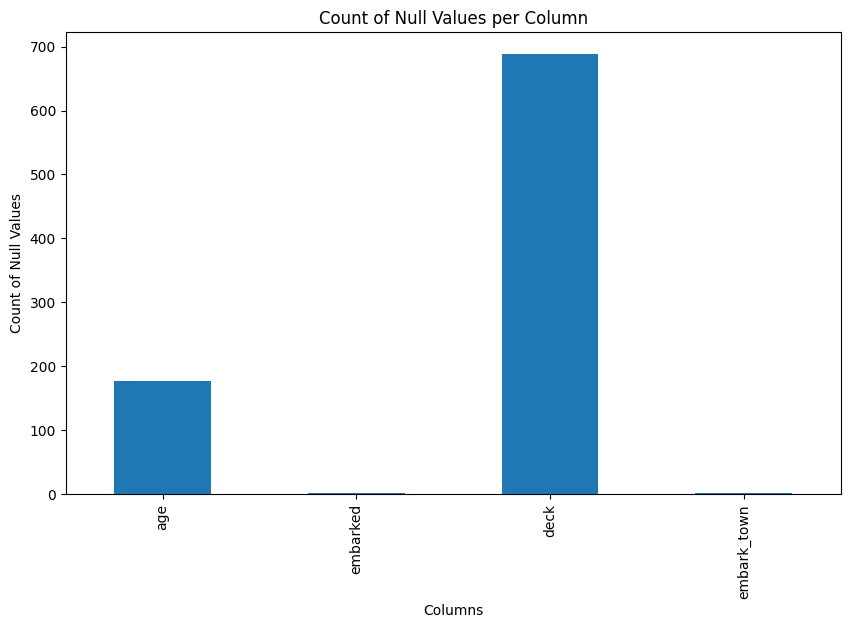

In [ ]:
# Plotting a bar chart of null values
plt.figure(figsize=(10, 6))
null[null > 0].plot(kind='bar')
plt.title('Count of Null Values per Column')
plt.xlabel('Columns')
plt.ylabel('Count of Null Values')
plt.show()

In [ ]:
#fill missing values for 'age'
df['age'] = df['age'].fillna(df['age'].mean())

In [ ]:
#for deck
df['deck'] = df['deck'].fillna(df['deck'].mode()[0])

In [ ]:
#for embarked and embark_town
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])
df['embark_town'] = df['embark_town'].fillna(df['embark_town'].mode()[0])

In [ ]:
notnull = df.isnull().sum()
print(notnull)

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64


In [ ]:
notnull = df.isnull().sum()
notnull_col = notnull[notnull>0]

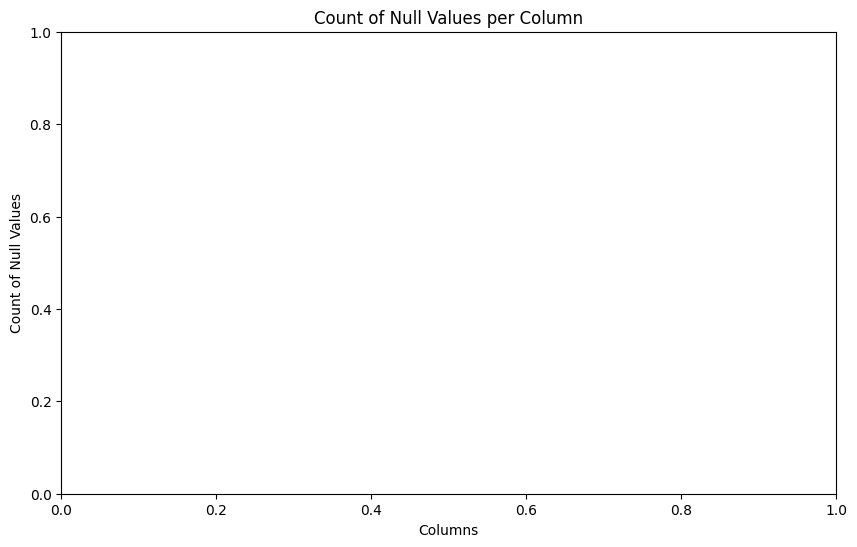

In [ ]:
# Plotting a bar chart to check if null values exist
plt.figure(figsize=(10, 6))
sns.barplot(x=notnull_col.index, y=notnull_col.values)
plt.title('Count of Null Values per Column')
plt.xlabel('Columns')
plt.ylabel('Count of Null Values')
plt.show()

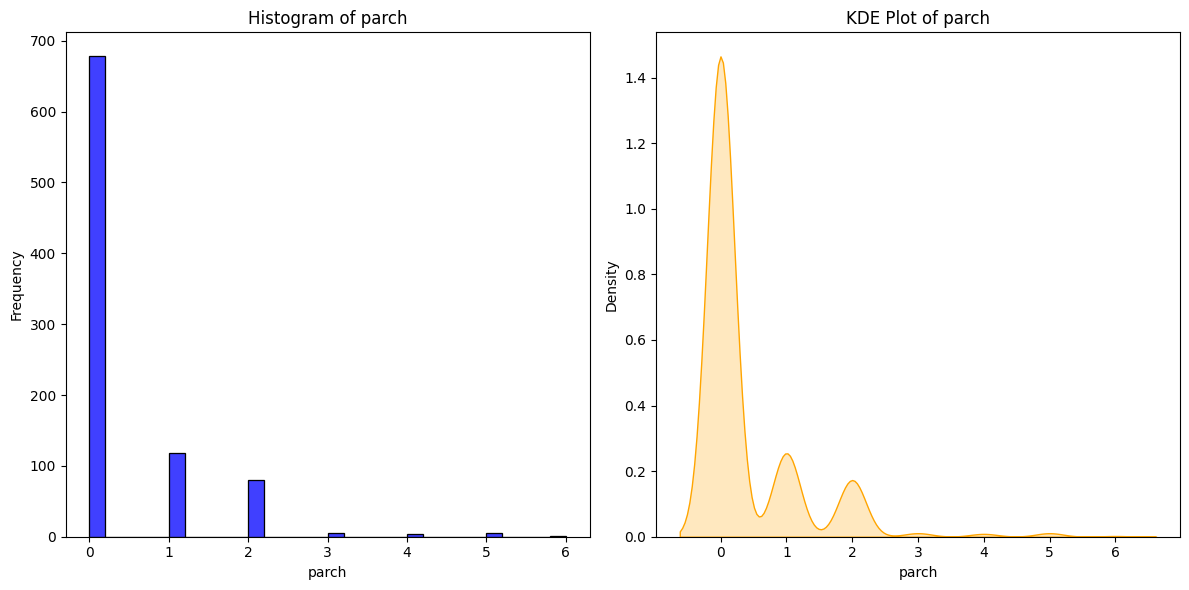

In [ ]:
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df['parch'], bins=30, kde=False, color='blue', edgecolor='black')
plt.title('Histogram of parch')
plt.xlabel('parch')
plt.ylabel('Frequency')

# KDE Plot
plt.subplot(1, 2, 2)
sns.kdeplot(df['parch'], fill=True, color='orange')
plt.title('KDE Plot of parch')
plt.xlabel('parch')
plt.ylabel('Density')

plt.tight_layout()
plt.show()


In [ ]:
#changing the skewed distribution into normal distribution.
#to do this we use log transformation
#this code is the log transportmation of the data.

# from scipy import stats # incase you haven’t installed stats before
# Apply Box-Cox Transformation
# Box-Cox requires positive data, so we ensure 'parch' is > 0
# Since 'parch' is count data, we add a small constant
df['parch_shifted'] = df['parch'] + 1  # Shift by 1 to avoid zeros
df['parch_boxcox'], _ = stats.boxcox(df['parch_shifted'])

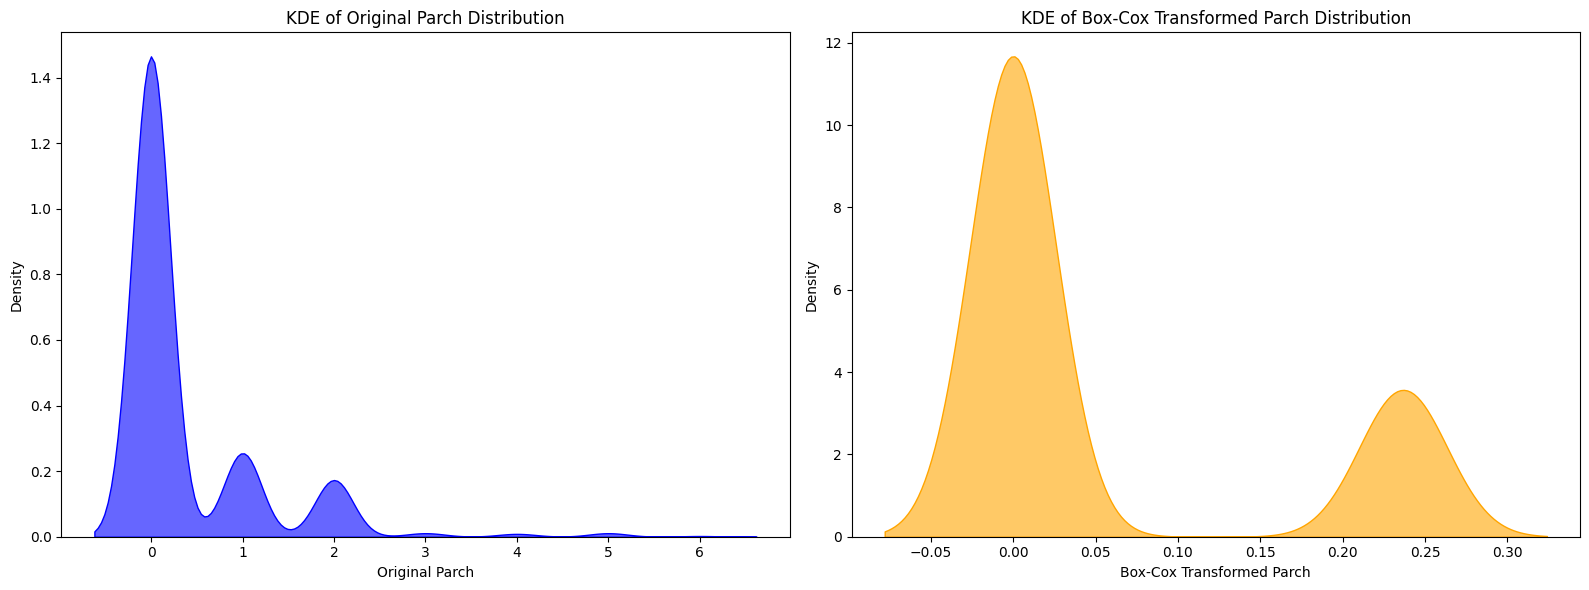

In [ ]:
# visualiziting the original skewed distribution and the log transformed normal distribution in a KDE Plot
plt.figure(figsize=(16, 6))

# KDE plot for original parch
plt.subplot(1, 2, 1)
sns.kdeplot(df['parch'], fill=True, color='blue', alpha=0.6)
plt.title('KDE of Original Parch Distribution')
plt.xlabel('Original Parch')
plt.ylabel('Density')

# KDE plot for Box-Cox transformed parch
plt.subplot(1, 2, 2)
sns.kdeplot(df['parch_boxcox'], fill=True, color='orange', alpha=0.6)
plt.title('KDE of Box-Cox Transformed Parch Distribution')
plt.xlabel('Box-Cox Transformed Parch')
plt.ylabel('Density')

plt.tight_layout()
plt.show()


In [ ]:
scaler = MinMaxScaler()

# Apply Min-Max Scaling to 'age' and 'fare'
df[['age_scaled', 'fare_scaled']] = scaler.fit_transform(df[['age', 'fare']])

In [ ]:
#adding a column for family size to understand total number of family members on board
df['family_size'] = df['sibsp'] + df['parch'] + 1 # Adding 1 to include themselves
df['fare_per_person'] = df['fare'] / df['family_size']
df['is_child'] = (df['age'] < 18).astype(int)  # 1 if child, 0 otherwise


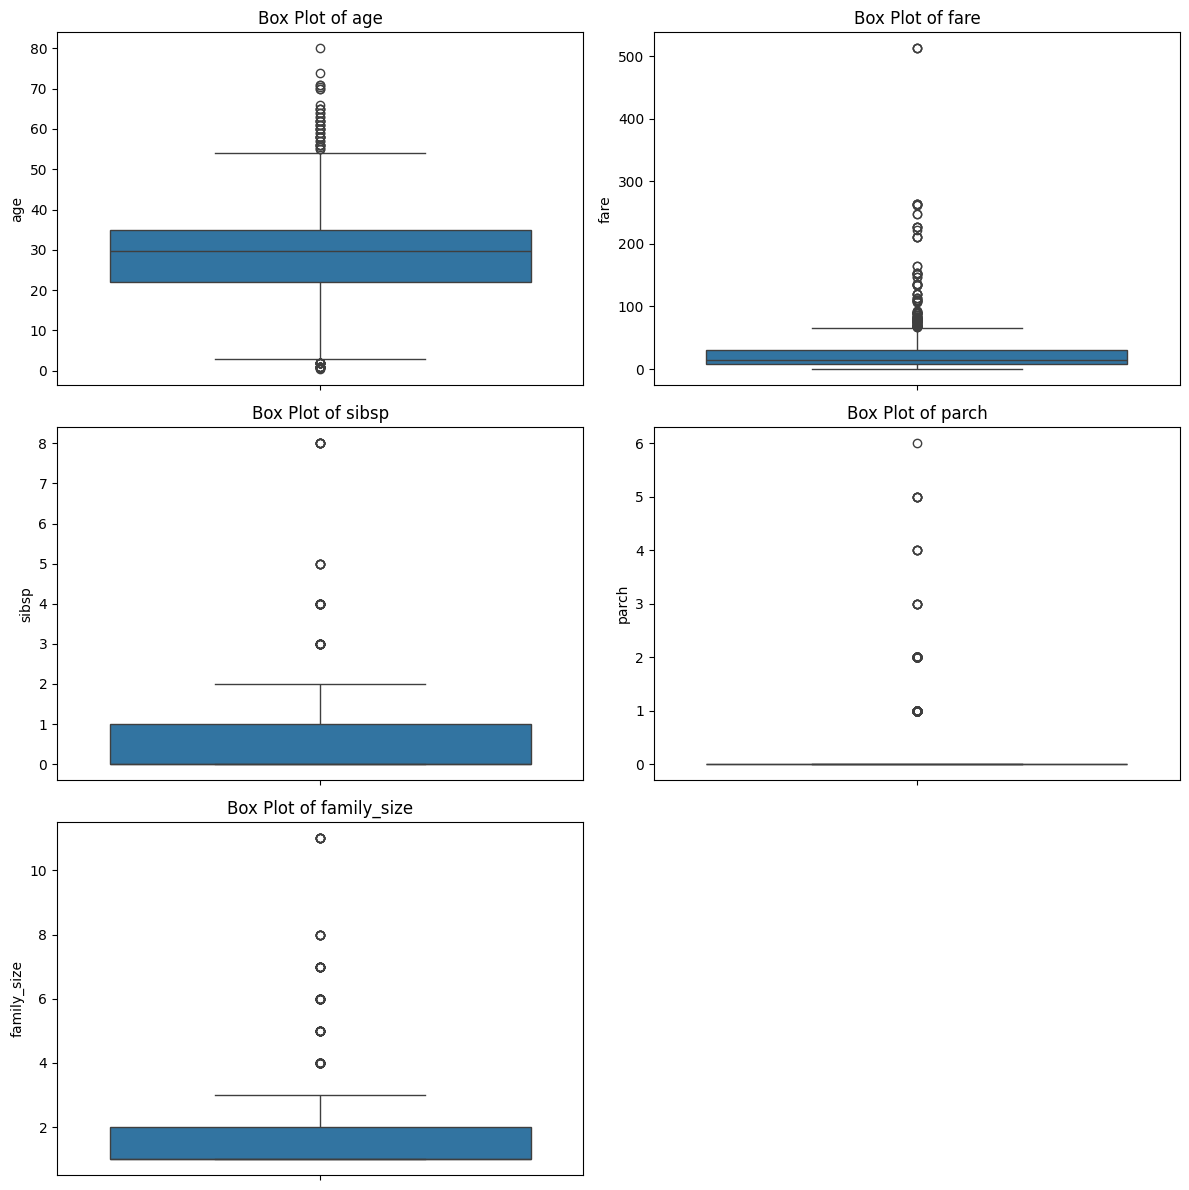

In [ ]:
numerical_features = ['age', 'fare', 'sibsp', 'parch', 'family_size']
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for each numerical feature
Q1 = df[numerical_features].quantile(0.25)
Q3 = df[numerical_features].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_iqr = ((df[numerical_features] < lower_bound) | (df[numerical_features] > upper_bound))

# --- Visualization: Box Plots ---
plt.figure(figsize=(12, 12)) # Increased figure size to accommodate more subplots
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 2, i) # Changed to 3 rows and 2 columns to fit 5 plots
    sns.boxplot(y=df[feature])
    plt.title(f'Box Plot of {feature}')
plt.tight_layout()
plt.show()